In [269]:
import pyodbc
import pandas as pd

In [270]:
SERVER_NAME = 'weathermon-cst2101.database.windows.net'
DATABASE_NAME = 'WeatherMonitor'
USERID = 'engadmin'
PASSWORD = 'c@r!os210688'
DB_DRIVER = 'ODBC Driver 13 for SQL Server'

driver = 'DRIVER={' + DB_DRIVER + '}'
server = 'SERVER=' + SERVER_NAME
database = 'DATABASE=' + DATABASE_NAME
uid = 'UID=' + USERID 
pwd = 'PWD=' + PASSWORD

CONNECTION_STRING = ';'.join([driver,server,database,uid,pwd])
CONNECTION_STRING

'DRIVER={ODBC Driver 13 for SQL Server};SERVER=weathermon-cst2101.database.windows.net;DATABASE=WeatherMonitor;UID=engadmin;PWD=c@r!os210688'

In [271]:
conn = pyodbc.connect(CONNECTION_STRING)
df1 = pd.read_sql('''SELECT * FROM [dbo].[PiSensors] ORDER BY eventprocessedutctime ASC ''', conn)
conn.close()
df1.describe()

,temperature,humidity,pressure
count,1101.000000,1101.000000,1101.000000
mean,38.946058,17.087293,1005.649410
std,0.620244,1.245860,1.564468
min,37.700000,13.810000,1003.430000
25%,38.620000,16.060000,1004.280000
50%,38.970000,16.820000,1005.350000
75%,39.360000,18.260000,1007.110000
max,40.490000,22.680000,1008.640000


In [272]:
conn = pyodbc.connect(CONNECTION_STRING)
df2 = pd.read_sql('''SELECT * FROM [dbo].[OpenWeather] order by [eventprocessedutctime] desc''', conn)
conn.close()
df2.describe()

,temperature
count,7.000000
mean,-8.571429
std,0.534522
min,-9.000000
25%,-9.000000
50%,-9.000000
75%,-8.000000
max,-8.000000


# Performing Analysis in SenseHat and Open Weather data

In [273]:
df1.sort_values(by='eventprocessedutctime', ascending=False).head(20)

,eventprocessedutctime,deviceid,temperature,humidity,pressure,room_number
1100,2017-12-18T21:14:12.2350521Z,alma-pi,39.10,18.19,1003.45,T114
1099,2017-12-18T21:13:52.1161243Z,alma-pi,39.19,19.88,1003.47,T114
1098,2017-12-18T21:13:31.9021677Z,alma-pi,39.10,18.86,1003.45,T114
1097,2017-12-18T21:13:12.6806586Z,alma-pi,39.13,18.70,1003.46,T114
1096,2017-12-18T21:12:52.4332703Z,alma-pi,39.04,18.71,1003.43,T114
1095,2017-12-18T21:12:32.2324311Z,alma-pi,38.99,19.05,1003.44,T114
1094,2017-12-18T21:12:12.0295952Z,alma-pi,39.15,18.66,1003.45,T114
1093,2017-12-18T21:11:51.8314118Z,alma-pi,39.10,18.44,1003.48,T114
1092,2017-12-18T21:11:32.4950050Z,alma-pi,39.11,18.77,1003.52,T114
1091,2017-12-18T21:11:12.2031371Z,alma-pi,39.06,18.34,1003.50,T114


In [274]:
df1['temperature'].max()

40.490000000000002

In [275]:
df1['temperature'].min()

37.700000000000003

In [276]:
df1['humidity'].max()

22.68

In [277]:
df1['humidity'].min()

13.81

In [278]:
df1[df1['temperature']>40.25].sort_values(by='eventprocessedutctime', ascending=False)

,eventprocessedutctime,deviceid,temperature,humidity,pressure,room_number
345,2017-12-18T17:01:14.6693280Z,alma-pi,40.26,15.75,1006.52,T331
343,2017-12-18T17:00:34.2257712Z,alma-pi,40.30,15.71,1006.56,T331
342,2017-12-18T17:00:14.9865851Z,alma-pi,40.26,15.70,1006.53,T331
341,2017-12-18T16:59:54.7462386Z,alma-pi,40.26,15.96,1006.52,T331
340,2017-12-18T16:59:34.5171688Z,alma-pi,40.33,15.30,1006.48,T331
339,2017-12-18T16:59:14.1734179Z,alma-pi,40.26,16.12,1006.50,T331
338,2017-12-18T16:58:54.9449771Z,alma-pi,40.37,15.73,1006.47,T331
337,2017-12-18T16:58:34.7096863Z,alma-pi,40.33,16.26,1006.45,T331
336,2017-12-18T16:58:14.4660638Z,alma-pi,40.33,15.80,1006.51,T331
335,2017-12-18T16:57:54.2250047Z,alma-pi,40.39,14.93,1006.46,T331


In [279]:
df2

,eventprocessedutctime,temperature,city
0,2017-12-18T22:00:00.00000Z,-9.0,"Ottawa, CA"
1,2017-12-18T21:00:00.00000Z,-8.0,"Ottawa, CA"
2,2017-12-18T20:00:00.00000Z,-8.0,"Ottawa, CA"
3,2017-12-18T19:00:00.00000Z,-8.0,"Ottawa, CA"
4,2017-12-18T18:00:00.00000Z,-9.0,"Ottawa, CA"
5,2017-12-18T17:00:00.00000Z,-9.0,"Otttawa, CA"
6,2017-12-18T16:00:00.00000Z,-9.0,"Ottawa, CA"


In [280]:
import numpy as np

In [281]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [282]:
i = np.array(df1.index)

In [283]:
UTCtime = df1['eventprocessedutctime']

In [284]:
time = np.array(UTCtime.str[0:10] + ' ' + UTCtime.str[11:19], dtype=np.datetime64)

In [285]:
temp = np.array(df1['temperature'])

In [286]:
hum = np.array(df1['humidity'])

In [287]:
press = np.array(df1['pressure'])

# For Open Weather

In [288]:
time2=np.array(df2['eventprocessedutctime'].str[0:10] + ' ' + df2['eventprocessedutctime'].str[11:19], dtype=np.datetime64)

In [289]:
temp2 = np.array(df2['temperature'])

# Charts

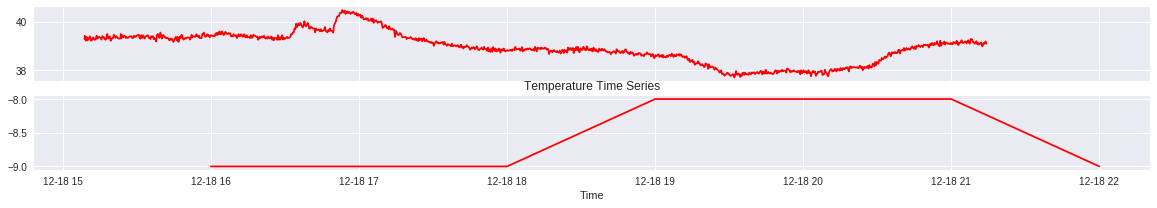

In [304]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(20,3))

ax[0].plot(time, temp, 'r')
ax[1].plot(time2, temp2, 'r')
plt.xlabel('Time')
plt.title('Temperature Time Series')
plt.show()

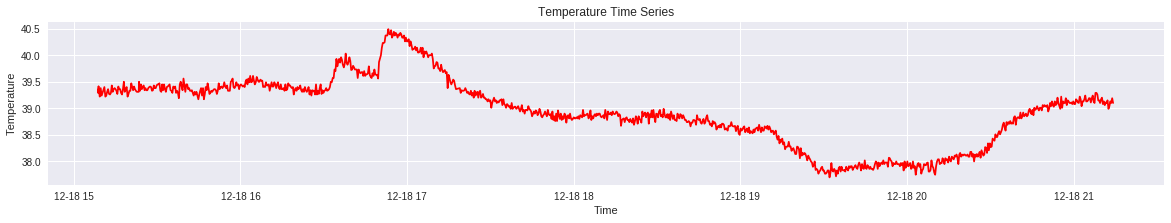

In [305]:
plt.subplots(nrows=1, figsize=(20,3))

plt.plot(time, temp, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.show()

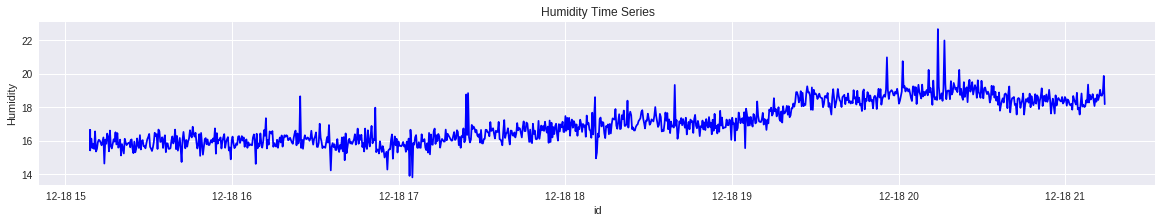

In [292]:
plt.subplots(figsize=(20,3))

plt.plot(time, hum, 'b')
plt.xlabel('id')
plt.ylabel('Humidity')
plt.title('Humidity Time Series')
plt.show()

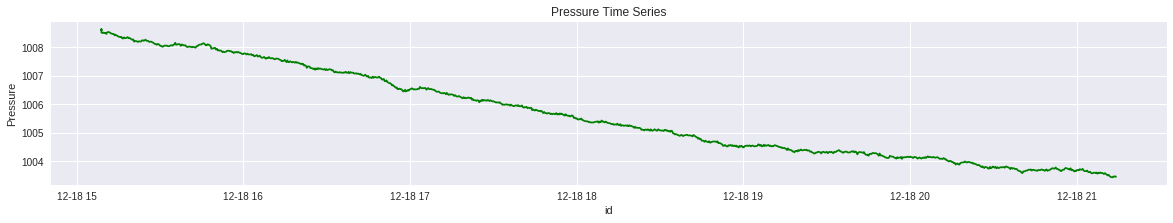

In [293]:
plt.subplots(figsize=(20,3))

plt.plot(time, press, 'g') # 'r' is the color red
plt.xlabel('id')
plt.ylabel('Pressure')
plt.title('Pressure Time Series')
plt.show()

(array([ 118.,   93.,   35.,  161.,  200.,  227.,  158.,   50.,   29.,   30.]),
 array([ 37.7  ,  37.979,  38.258,  38.537,  38.816,  39.095,  39.374,
         39.653,  39.932,  40.211,  40.49 ]),
 <a list of 10 Patch objects>)

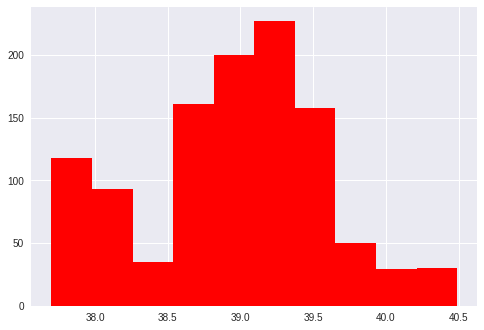

In [294]:
plt.hist(temp, color='r')

(array([   6.,   82.,  354.,  249.,  131.,  235.,   38.,    3.,    1.,    2.]),
 array([ 13.81 ,  14.697,  15.584,  16.471,  17.358,  18.245,  19.132,
         20.019,  20.906,  21.793,  22.68 ]),
 <a list of 10 Patch objects>)

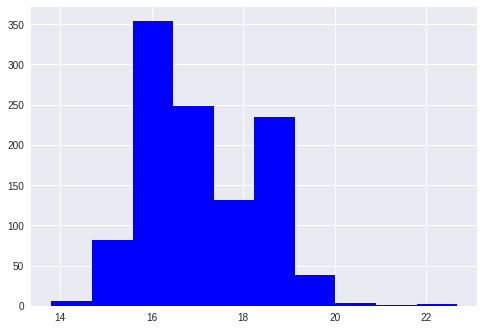

In [295]:
plt.hist(hum, color='b')

(array([ 169.,  192.,  118.,  105.,   81.,   99.,   52.,   87.,  124.,   74.]),
 array([ 1003.43 ,  1003.951,  1004.472,  1004.993,  1005.514,  1006.035,
         1006.556,  1007.077,  1007.598,  1008.119,  1008.64 ]),
 <a list of 10 Patch objects>)

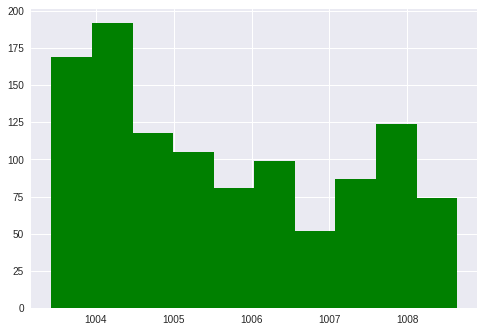

In [296]:
plt.hist(press, color='g')

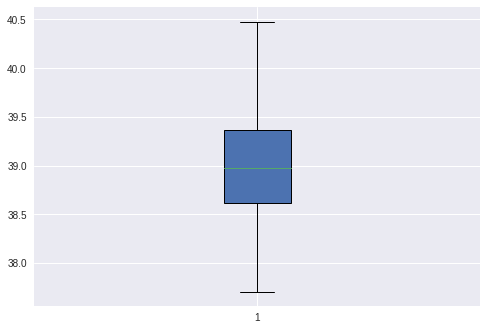

In [297]:
plt.boxplot([temp],vert=True,patch_artist=True);   

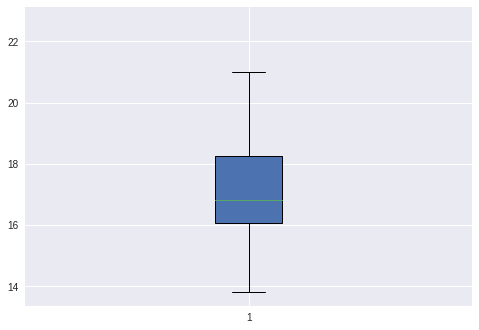

In [298]:
plt.boxplot([hum],vert=True,patch_artist=True);  

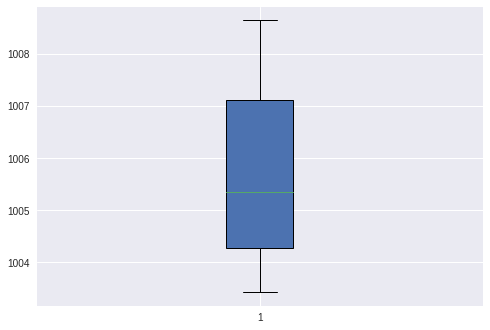

In [299]:
plt.boxplot([press],vert=True,patch_artist=True);  

In [300]:
# Time Series for RaspberryPi
tempSeries = pd.Series(temp, index=time)
humSeries = pd.Series(hum, index=time)
pressSeries = pd.Series(press, index=time)

In [301]:
# Time Series for OpenWeather
temp2Series = pd.Series(temp2, index=time2)

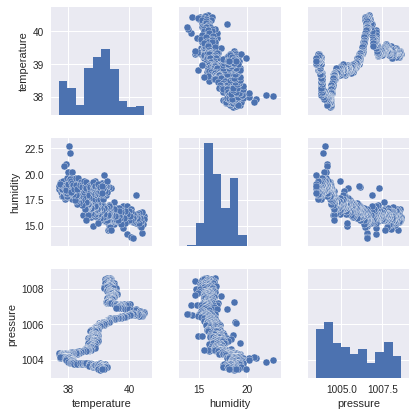

In [302]:
seaborn.pairplot(df1, size=2.0)